# 🤖 Inteligencia Artificial Aplicada para la Economía
## Universidad de los Andes

### 👨‍🏫 Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilo-vega-169084b1/)
- **Asistente de Docencia:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergio-julian-zona-moreno/)

## 📊 Regresiones, Regularización y Métricas de Evaluación

Este notebook explora los conceptos fundamentales de regresión lineal y logística, técnicas de regularización (Ridge y Lasso), y diferentes métricas de evaluación para modelos de machine learning. Implementaremos estos conceptos usando scikit-learn y visualizaremos los resultados con matplotlib y seaborn.

### Objetivos:
- Implementar regresión lineal y logística
- Aplicar técnicas de regularización
- Evaluar modelos usando diferentes métricas
- Visualizar y comparar resultados

### Requisitos de Software:
- Conocimientos básicos de Python
- Familiaridad con NumPy y Pandas
- Comprensión básica de conceptos estadísticos

### Requisitos Técnicos:
- **Token de Hugging Face**: Necesario para acceder al dataset. Puedes obtener tu token en [Hugging Face](https://huggingface.co/settings/tokens)
- **Entorno de Ejecución**:
  - Recomendado: GPU T4 (Cambiar en: Runtime -> Change runtime type -> GPU)
  - Alternativa: CPU (el código funcionará, pero será más lento)
- **Memoria RAM**: Mínimo 4GB recomendados
- **Espacio en Disco**: ~200 GB para datasets y modelos

💡 **Nota**: Aunque recomendamos usar GPU para mayor velocidad, todo el código es compatible con CPU y funcionará correctamente, solo que tomará más tiempo en ejecutarse.

# 🛠️ Instalaciones Necesarias

Antes de comenzar, necesitamos instalar algunas librerías específicas para nuestro análisis. A continuación se listan las librerías y su propósito:

### Manejo de Datos y Cálculos
- **pandas**: Manipulación y análisis de datos tabulares. Esencial para trabajar con DataFrames y Series, permitiendo operaciones como filtrado, agrupación y transformación de datos
- **numpy**: Operaciones numéricas y matrices multidimensionales. Base fundamental para cálculos científicos y operaciones vectorizadas
- **scipy**: Funciones científicas y estadísticas avanzadas, incluyendo optimización, álgebra lineal y procesamiento de señales

### Hugging Face
- **huggingface_hub**: Acceso a modelos y datasets de Hugging Face. Permite descargar y utilizar modelos pre-entrenados y datasets de la comunidad
- **datasets**: Manejo eficiente de datasets de Hugging Face. Optimizado para grandes conjuntos de datos con funciones de carga streaming

### Visualización
- **matplotlib**: Biblioteca base para crear gráficos estáticos, desde simples gráficos de líneas hasta visualizaciones complejas personalizables
- **seaborn**: Construida sobre matplotlib, ofrece una interfaz de alto nivel para visualizaciones estadísticas con temas y paletas predefinidas
- **plotly**: Creación de gráficos interactivos para web, permitiendo zoom, hover y selección de datos
- **yellowbrick**: Visualizadores específicos para machine learning, incluyendo matrices de confusión, curvas ROC y visualizaciones de validación

### Machine Learning
- **scikit-learn**: Framework completo de machine learning que incluye algoritmos de clasificación, regresión, clustering y herramientas de preprocesamiento
- **imbalanced-learn**: Especializada en el manejo de datasets desbalanceados, proporcionando técnicas como SMOTE y diversos métodos de sampling

### Utilidades
- **tqdm**: Barras de progreso para monitorear el avance de procesos largos, compatible con bucles y operaciones iterativas
- **joblib**: Herramienta para paralelización de procesos y caching de resultados computacionales pesados
- **fsspec**: Sistema de archivos abstracto necesario para la compatibilidad con diferentes sistemas de almacenamiento

Ejecutemos la celda de código siguiente para instalar todas las librerías necesarias. La flag -q asegura una instalación silenciosa para mantener limpia la salida:

In [ ]:
# Instalación silenciosa de librerías
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install -q fsspec==2024.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 14.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you h

# 📊 Base de Datos: Default of Credit Card Clients

Para este ejercicio usaremos la base de datos "Default of Credit Card Clients" disponible en [Hugging Face](https://huggingface.co/datasets/scikit-learn/credit-card-clients), originalmente obtenida del repositorio UCI Machine Learning.

## 📝 Descripción
Esta base de datos contiene información sobre incumplimientos de pago, factores demográficos, datos crediticios, historial de pagos y estados de cuenta de clientes de tarjetas de crédito en Taiwán durante el período de abril a septiembre de 2005.

## 🔍 Variables Disponibles
La base contiene 25 variables:

### Información Personal
- **ID**: Identificador único de cada cliente
- **LIMIT_BAL**: Monto de crédito otorgado en dólares NT (incluye crédito individual y familiar)
- **SEX**: Género (1=masculino, 2=femenino)
- **EDUCATION**: Nivel educativo
 - 1 = Posgrado
 - 2 = Universidad
 - 3 = Secundaria
 - 4 = Otros
 - 5,6 = Desconocido
- **MARRIAGE**: Estado civil (1=casado, 2=soltero, 3=otros)
- **AGE**: Edad en años

### Historial de Pagos
- **PAY_0** a **PAY_6**: Estado de pago mensual (de septiembre a abril 2005)
 - -1 = Pago a tiempo
 - 1 = Retraso de un mes
 - 2 = Retraso de dos meses
 - ...
 - 9 = Retraso de nueve meses o más

### Estados de Cuenta
- **BILL_AMT1** a **BILL_AMT6**: Monto facturado mensual (septiembre a abril 2005)
- **PAY_AMT1** a **PAY_AMT6**: Monto pagado mensual (septiembre a abril 2005)

### Variable Objetivo
- **default.payment.next.month**: Incumplimiento de pago (1=sí, 0=no)

## 🎯 Objetivo
Utilizaremos esta base de datos para:
1. Predecir la probabilidad de incumplimiento de pago
2. Identificar los factores más importantes que influyen en el incumplimiento
3. Evaluar diferentes técnicas de regularización para mejorar nuestras predicciones
4. Analizar métricas de evaluación para modelos de clasificación

## 💡 Consideraciones
- Los montos están en dólares taiwaneses (NT)
- Los datos incluyen tanto variables numéricas como categóricas
- Es un problema de clasificación binaria (incumplimiento sí/no)
- Existe un desbalance natural en las clases (más pagos a tiempo que incumplimientos)

## Llamada de la base de datos

Por medio de la función streaming, vamos a tomar 10.000 datos aleatorios de la base de datos de HuggingFace. Posteriormente, vamos a estudiar los datos y su naturaleza.

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset y lo mezclamos
dataset = load_dataset("scikit-learn/credit-card-clients", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))



README.md:   0%|          | 0.00/2.64k [00:00<?, ?B/s]

## 🛠️ PREPROCESAMIENTO DE DATOS

El preprocesamiento de datos es una fase fundamental en el desarrollo de modelos de machine learning. Esta etapa determina en gran medida la calidad y fiabilidad de nuestras predicciones, ya que transforma los datos crudos en un formato adecuado para el entrenamiento de modelos.

En esta sección desarrollaremos cuatro procesos esenciales:

* **Análisis estadístico descriptivo**: Examinaremos las distribuciones, tendencias centrales y dispersión de nuestras variables
* **Análisis de balance de clases**: Evaluaremos la proporción entre las clases de nuestra variable objetivo
* **Estandarización**: Transformaremos nuestras variables numéricas para que estén en escalas comparables
* **Codificación de variables categóricas**: Convertiremos las variables categóricas en formato numérico

Cada uno de estos pasos es crítico para garantizar que nuestros modelos puedan procesar los datos correctamente y generar predicciones confiables.


=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   LIMIT_BAL                   10000 non-null  float64
 2   SEX                         10000 non-null  int64  
 3   EDUCATION                   10000 non-null  int64  
 4   MARRIAGE                    10000 non-null  int64  
 5   AGE                         10000 non-null  int64  
 6   PAY_0                       10000 non-null  int64  
 7   PAY_2                       10000 non-null  int64  
 8   PAY_3                       10000 non-null  int64  
 9   PAY_4                       10000 non-null  int64  
 10  PAY_5                       10000 non-null  int64  
 11  PAY_6                       10000 non-null  int64  
 12  BILL_AMT1                   10000 non-null  int64  
 1

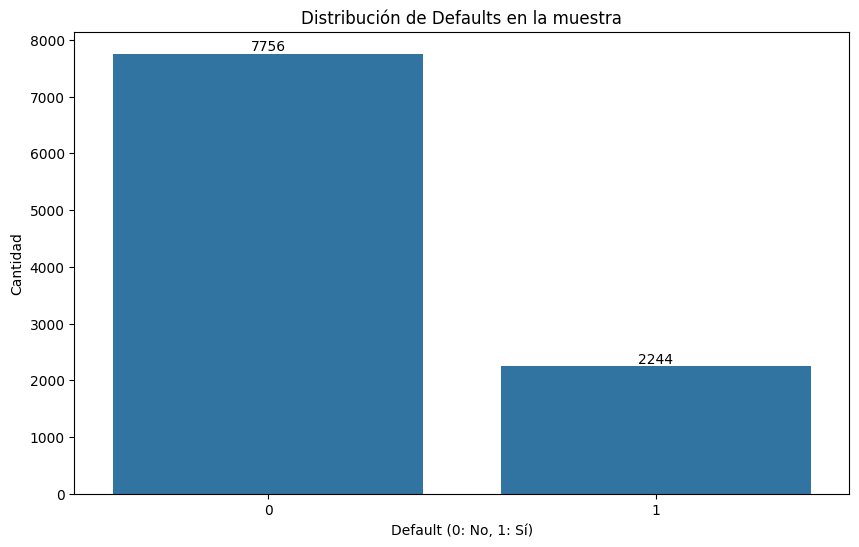

In [ ]:
# 1. Examinamos la información básica del DataFrame
print("\n=== Información del DataFrame ===")
print(df.info())

# 2. Verificamos los tipos de datos y valores únicos para cada columna
print("\n=== Valores únicos por columna ===")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Tipo de dato: {df[column].dtype}")
    print(f"Valores únicos: {df[column].nunique()}")
    print(f"Primeros valores únicos: {sorted(df[column].unique())[:5]}")

# 3. Verificamos valores nulos
print("\n=== Valores nulos ===")
print(df.isnull().sum())

# 4. Estadísticas descriptivas básicas
print("\n=== Estadísticas descriptivas ===")
print(df.describe())

# 5. Debalance de clases

print("📊 Distribución de la variable objetivo (default.payment.next.month):")
class_dist = df['default.payment.next.month'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default.payment.next.month')
plt.title('Distribución de Defaults en la muestra')
plt.xlabel('Default (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

In [ ]:
# Funciones de Preprocesamiento de datos

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

def categorize_features(df):
    """
    Separa las características en numéricas y categóricas.
    """
    # Variables numéricas (montos y edad)
    numeric_features = [
        'LIMIT_BAL', 'AGE',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
    ]

    # Variables categóricas
    categorical_features = [
        'SEX', 'EDUCATION', 'MARRIAGE',
        'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
    ]

    return numeric_features, categorical_features

def clean_categorical_data(df):
    """
    Limpia y corrige valores en variables categóricas.
    """
    df = df.copy()

    # Corregir valores en EDUCATION
    # 0, 5 y 6 son valores no definidos, los convertimos a 4 (Others)
    df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

    # Corregir valores en MARRIAGE
    # 0 es un valor no definido, lo convertimos a 3 (Others)
    df['MARRIAGE'] = df['MARRIAGE'].replace([0], 3)

    return df

def preprocess_data(df):
    """
    Realiza el preprocesamiento completo de los datos.
    """
    # 1. Separar features
    numeric_features, categorical_features = categorize_features(df)

    # 2. Limpiar datos categóricos
    df = clean_categorical_data(df)

    # 3. Estandarizar variables numéricas
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    # 4. Codificar variables categóricas
    label_encoders = {}
    for feature in categorical_features:
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature].astype(str))

    # 5. Separar features y target
    X = df.drop('default.payment.next.month', axis=1)
    y = df['default.payment.next.month']

    # 6. Guardar información del preprocesamiento
    preprocessing_info = {
        'numeric_features': numeric_features,
        'categorical_features': categorical_features,
        'scaler': scaler,
        'label_encoders': label_encoders
    }

    return X, y, preprocessing_info

def print_preprocessing_summary(X, y):
    """
    Imprime un resumen del preprocesamiento.
    """
    print("\n=== Resumen del Preprocesamiento ===")
    print(f"Dimensiones de X: {X.shape}")

    print("\nDistribución de clases:")
    print(pd.Series(y).value_counts(normalize=True).round(3))

    print("\nEstadísticas de algunas variables numéricas:")
    print(X.describe().round(2).head())

In [ ]:
# Ejecutar el Preprocesamiento

# Importar y cargar datos
from datasets import load_dataset
import pandas as pd

# 1. Cargar datos
dataset = load_dataset("scikit-learn/credit-card-clients", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))

# 2. Aplicar preprocesamiento
X, y, preprocessing_info = preprocess_data(df)

# 3. Imprimir resumen
print_preprocessing_summary(X, y)

# 4. Verificar las características procesadas
print("\n=== Características procesadas ===")
print("\nCaracterísticas numéricas:")
print(preprocessing_info['numeric_features'])
print("\nCaracterísticas categóricas:")
print(preprocessing_info['categorical_features'])

# 5. Mostrar información adicional sobre los datos procesados
print("\n=== Información adicional ===")
print(f"Número total de características: {X.shape[1]}")
print(f"Número total de observaciones: {X.shape[0]}")
print("\nPrimeras columnas del dataset procesado:")
print(X.head())


=== Resumen del Preprocesamiento ===
Dimensiones de X: (10000, 24)

Distribución de clases:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64

Estadísticas de algunas variables numéricas:
             ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
count  10000.00   10000.00  10000.00   10000.00  10000.00  10000.00  10000.00   
mean    5051.03      -0.00      0.58       0.81      0.58      0.00      1.88   
std     2961.31       1.00      0.49       0.73      0.52      1.00      1.28   
min        1.00      -1.20      0.00       0.00      0.00     -1.54      0.00   
25%     2500.75      -0.89      0.00       0.00      0.00     -0.79      1.00   

          PAY_2     PAY_3    PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
count  10000.00  10000.00  10000.0  ...   10000.00   10000.00   10000.00   
mean       1.76      1.76      1.7  ...       0.00       0.00      -0.00   
std        1.30      1.31      1.2  ...       1.00       1.00   

# 🎯 ENTRENAMIENTO DE MODELOS DE CLASIFICACIÓN

El entrenamiento de modelos es una fase crítica en el desarrollo de sistemas de machine learning para la predicción de riesgo crediticio. Esta etapa determina la capacidad de nuestros modelos para aprender patrones y realizar predicciones precisas sobre el comportamiento de pago de los clientes.

En esta sección desarrollaremos dos procesos fundamentales:**Preparación para el entrenamiento** y **Proceso de entrenamiento**

Cada uno de estos pasos es esencial para desarrollar un sistema robusto de predicción de riesgo crediticio que pueda identificar efectivamente potenciales casos de default.

## Preparación para el entrenamiento

Estableceremos el entorno controlado para nuestros experimentos mediante:
  - Fijación de la semilla aleatoria para garantizar reproducibilidad
  - División estratificada de datos en conjuntos de entrenamiento (80%) y prueba (20%)
  - Selección de modelos de regresión logística con diferentes enfoques de regularización



In [ ]:
# --- PREPARACIÓN PARA EL ENTRENAMIENTO ---

# Importamos las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fijamos la semilla aleatoria para garantizar reproducibilidad de resultados
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# División estratificada de datos (80% entrenamiento, 20% prueba)
# stratify=y asegura que la proporción de las clases se mantenga en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
   X,              # Matriz de características
   y,              # Vector objetivo (default/no default)
   test_size=0.2,  # 20% para prueba
   random_state=RANDOM_STATE,  # Semilla para reproducibilidad
   stratify=y      # Mantiene proporción de clases
)

# Definición de los modelos a entrenar
models = {
   # Modelo básico sin regularización
   # Este modelo puede sobreajustarse si hay muchas características
   "Logit Básico": LogisticRegression(
       random_state=RANDOM_STATE
   ),

   # Modelo con regularización L2 (Ridge)
   # La regularización Ridge penaliza coeficientes grandes al cuadrado
   # Es útil cuando todas las características son importantes pero queremos reducir su impacto
   "Logit Ridge": LogisticRegression(
       penalty='l2',          # Tipo de regularización: L2 (suma de cuadrados)
       C=1.0,                # Inverso de la fuerza de regularización:
                            # - C grande (ej: 10.0): regularización débil, puede sobreajustar
                            # - C pequeño (ej: 0.1): regularización fuerte, puede subajustar
                            # - C = 1.0: valor intermedio/moderado de regularización
       random_state=RANDOM_STATE
   ),

   # Modelo con regularización L1 (Lasso)
   # La regularización Lasso puede hacer que algunos coeficientes sean exactamente 0
   # Es útil para selección de características, eliminando las menos importantes
   "Logit Lasso": LogisticRegression(
       penalty='l1',          # Tipo de regularización: L1 (valor absoluto)
       solver='liblinear',    # Necesario para L1, ya que no todos los solvers la soportan
       C=1.0,                # Mismo concepto que en Ridge:
                            # - C grande: más características se mantienen
                            # - C pequeño: más características se vuelven 0
                            # - C = 1.0: balance entre mantener y eliminar características
       random_state=RANDOM_STATE
   )
}

# Diccionarios para almacenar resultados del entrenamiento
predictions = {}      # Almacenará predicciones binarias (0/1)
probabilities = {}    # Almacenará probabilidades [0,1]

# Imprimimos información sobre la división de datos
print("=== Información de la División de Datos ===")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print("\nDistribución de clases:")
print("\nConjunto de entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True).round(3))
print("\nConjunto de prueba:")
print(pd.Series(y_test).value_counts(normalize=True).round(3))

=== Información de la División de Datos ===
Dimensiones de X_train: (8000, 24)
Dimensiones de X_test: (2000, 24)

Distribución de clases:

Conjunto de entrenamiento:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64

Conjunto de prueba:
default.payment.next.month
0    0.776
1    0.224
Name: proportion, dtype: float64


## Iniciar entrenamiento
  - Modelo básico sin regularización
  - Modelo con regularización Ridge (L2)
  - Modelo con regularización Lasso (L1)

In [ ]:
# --- ENTRENAMIENTO DE MODELOS ---

# Iteramos sobre cada modelo para entrenamiento y predicciones
for name, model in models.items():
   print(f"\n=== Entrenando modelo: {name} ===")

   # Entrenamiento del modelo
   model.fit(X_train, y_train)

   # Realizar predicciones en conjunto de prueba
   predictions[name] = model.predict(X_test)

   # Calcular probabilidades de la clase positiva (default)
   probabilities[name] = model.predict_proba(X_test)[:, 1]

   # Mostrar los coeficientes del modelo
   coef = pd.DataFrame({
       'Feature': X_train.columns,
       'Coefficient': model.coef_[0]
   }).sort_values('Coefficient', ascending=False)

   print("\nTop 5 características más importantes (coeficientes más altos):")
   print(coef.head())
   print("\nTop 5 características menos importantes (coeficientes más bajos):")
   print(coef.tail())

   # Calcular y mostrar el número de características con coeficiente cero (para Lasso)
   if name == "Logit Lasso":
       zero_coef = (abs(model.coef_[0]) < 1e-10).sum()
       print(f"\nNúmero de características con coeficiente cero: {zero_coef}")

# Calculamos y mostramos el tiempo de ejecución promedio para predicciones
import time

print("\n=== Evaluación de Tiempo de Predicción ===")
for name, model in models.items():
   times = []
   for _ in range(100):  # Realizamos 100 predicciones para obtener un promedio estable
       start_time = time.time()
       model.predict(X_test[:100])  # Predicción para 100 muestras
       times.append(time.time() - start_time)

   print(f"\n{name}:")
   print(f"Tiempo promedio de predicción: {np.mean(times)*1000:.2f} ms")
   print(f"Desviación estándar: {np.std(times)*1000:.2f} ms")


=== Entrenando modelo: Logit Básico ===

Top 5 características más importantes (coeficientes más altos):
      Feature  Coefficient
6       PAY_0     0.258383
8       PAY_3     0.199369
9       PAY_4     0.181494
17  BILL_AMT6     0.083559
16  BILL_AMT5     0.083391

Top 5 características menos importantes (coeficientes más bajos):
      Feature  Coefficient
19   PAY_AMT2    -0.231332
1   LIMIT_BAL    -0.246413
2         SEX    -0.404656
3   EDUCATION    -0.421958
4    MARRIAGE    -0.539713

=== Entrenando modelo: Logit Ridge ===


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 5 características más importantes (coeficientes más altos):
      Feature  Coefficient
6       PAY_0     0.258383
8       PAY_3     0.199369
9       PAY_4     0.181494
17  BILL_AMT6     0.083559
16  BILL_AMT5     0.083391

Top 5 características menos importantes (coeficientes más bajos):
      Feature  Coefficient
19   PAY_AMT2    -0.231332
1   LIMIT_BAL    -0.246413
2         SEX    -0.404656
3   EDUCATION    -0.421958
4    MARRIAGE    -0.539713

=== Entrenando modelo: Logit Lasso ===

Top 5 características más importantes (coeficientes más altos):
      Feature  Coefficient
6       PAY_0     0.378790
14  BILL_AMT3     0.172862
8       PAY_3     0.149104
9       PAY_4     0.099900
16  BILL_AMT5     0.068654

Top 5 características menos importantes (coeficientes más bajos):
      Feature  Coefficient
3   EDUCATION    -0.132819
18   PAY_AMT1    -0.152071
4    MARRIAGE    -0.195663
12  BILL_AMT1    -0.324727
19   PAY_AMT2    -0.414964

Número de características con coeficiente cero:

# 📊 MÉTRICAS DE EVALUACIÓN DE MODELOS DE RIESGO CREDITICIO

La evaluación exhaustiva de modelos de clasificación para riesgo crediticio requiere un análisis desde múltiples perspectivas. Dividimos nuestras métricas de evaluación en dos categorías principales: Métricas tradicionales y Avanzadas



## 🎯 Métricas de Evaluación Tradicionales

Estas métricas fundamentales nos proporcionan una comprensión básica pero esencial del desempeño del modelo:

### Matriz de Confusión y sus Derivados

* **Accuracy** (0 a 1):
    * Proporción total de predicciones correctas
    * Valores más altos son mejores (> 0.7 suele ser aceptable)
    * Aunque útil, puede ser engañosa en datos desbalanceados como los nuestros
    * Ejemplo: Un accuracy de 0.95 indica que el 95% de todas las predicciones fueron correctas

* **Precision** (0 a 1):
    * Del total de clientes que predecimos como morosos, cuántos realmente lo son
    * Valores altos (> 0.6) indican que cuando predecimos default, solemos estar en lo correcto
    * Crucial para minimizar falsos positivos que podrían llevar a rechazar buenos clientes
    * Ejemplo: Una precision de 0.8 significa que de cada 10 clientes que clasificamos como morosos, 8 realmente lo son

* **Recall** (0 a 1):
    * Del total de clientes realmente morosos, cuántos logramos identificar
    * Valores altos (> 0.6) indican que detectamos bien los defaults reales
    * Vital para minimizar pérdidas por defaults no detectados
    * Ejemplo: Un recall de 0.7 significa que detectamos el 70% de todos los defaults reales

* **F1-Score** (0 a 1):
    * Media armónica entre Precision y Recall
    * Valores más altos son mejores (> 0.6 suele ser bueno)
    * Proporciona un balance entre ambas métricas
    * Especialmente útil cuando buscamos un equilibrio entre detectar defaults y no rechazar buenos clientes

### Curva ROC y AUC
* La curva ROC visualiza el balance entre verdaderos y falsos positivos a diferentes umbrales
* El AUC va de 0 a 1:
    * 0.5 indica un modelo aleatorio (línea diagonal)
    * > 0.7 se considera aceptable
    * > 0.8 se considera bueno
    * > 0.9 se considera excelente
* Es especialmente útil en problemas de crédito donde necesitamos balancear riesgos




=== Tabla Comparativa de Métricas ===
      Modelo  Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logit Básico    0.7875     0.6463  0.1180    0.1996   0.6823
 Logit Ridge    0.7875     0.6463  0.1180    0.1996   0.6823
 Logit Lasso    0.7970     0.7590  0.1403    0.2368   0.6890

=== Matrices de Confusión ===


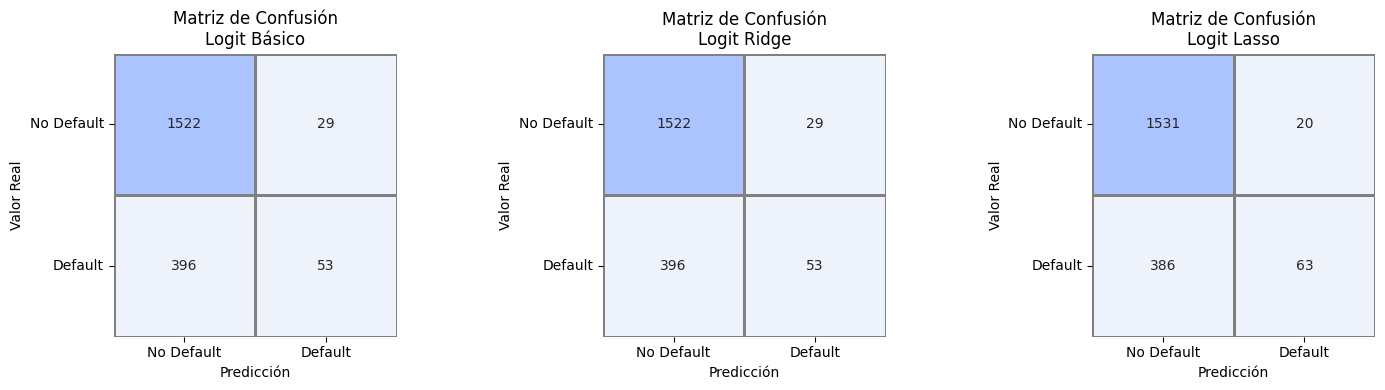


=== Curvas ROC ===


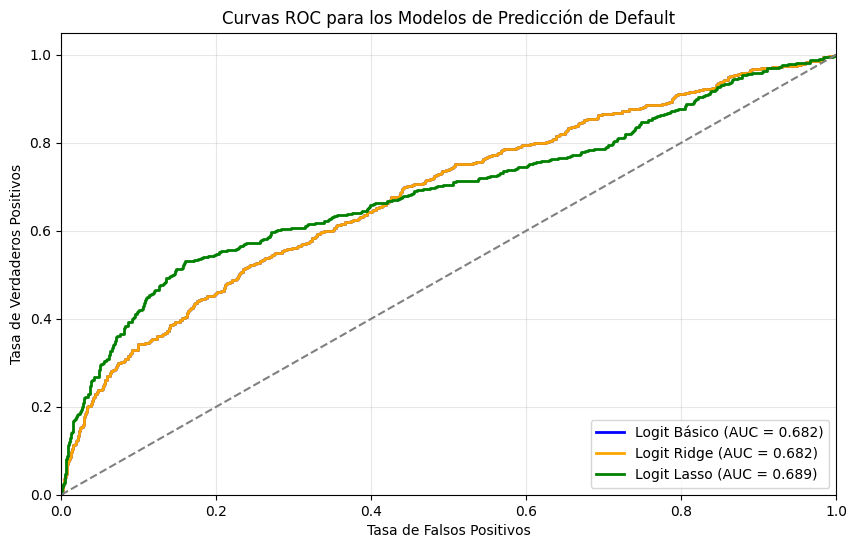

In [ ]:
# --- Evaluación y Métricas Tradicionales ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

class ModelEvaluator:
    def __init__(self, y_true, predictions, probabilities):
        """
        Inicializa el evaluador con los datos necesarios.
        """
        self.y_true = y_true
        self.predictions = predictions
        self.probabilities = probabilities
        self.colors = ["#EDF2FB", "#ABC4FF"]  # Paleta de colores para visualizaciones

    def create_metrics_table(self):
        """
        Crea una tabla comparativa con todas las métricas de los modelos.
        """
        metrics = []
        for name in self.predictions.keys():
            metrics.append({
                'Modelo': name,
                'Accuracy': accuracy_score(self.y_true, self.predictions[name]),
                'Precision': precision_score(self.y_true, self.predictions[name], zero_division=0),
                'Recall': recall_score(self.y_true, self.predictions[name]),
                'F1-Score': f1_score(self.y_true, self.predictions[name]),
                'AUC-ROC': roc_auc_score(self.y_true, self.probabilities[name])
            })

        return pd.DataFrame(metrics).round(4)

    def plot_confusion_matrices(self):
        """
        Visualiza las matrices de confusión para cada modelo.
        """
        n_models = len(self.predictions)
        fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
        if n_models == 1:
            axes = [axes]

        cmap = sns.color_palette(self.colors, as_cmap=True)

        for idx, (name, y_pred) in enumerate(self.predictions.items()):
            cm = confusion_matrix(self.y_true, y_pred)

            sns.heatmap(
                cm,
                annot=True,
                fmt='d',
                ax=axes[idx],
                cmap=cmap,
                cbar=False,
                linewidths=1,
                linecolor='gray',
                square=True
            )

            axes[idx].set_title(f'Matriz de Confusión\n{name}')
            axes[idx].set_xlabel('Predicción')
            axes[idx].set_ylabel('Valor Real')
            axes[idx].set_xticklabels(['No Default', 'Default'])
            axes[idx].set_yticklabels(['No Default', 'Default'], rotation=0)

        plt.tight_layout()
        return fig

    def plot_roc_curves(self):
        """
        Visualiza las curvas ROC para múltiples modelos.
        """
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['blue', 'orange', 'green']

        for (name, probs), color in zip(self.probabilities.items(), colors):
            fpr, tpr, _ = roc_curve(self.y_true, probs)
            auc = roc_auc_score(self.y_true, probs)
            ax.plot(fpr, tpr, color=color, lw=2,
                   label=f'{name} (AUC = {auc:.3f})')

        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
        ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.05],
               xlabel='Tasa de Falsos Positivos',
               ylabel='Tasa de Verdaderos Positivos',
               title='Curvas ROC para los Modelos de Predicción de Default')
        ax.legend(loc="lower right")
        ax.grid(True, alpha=0.3)

        return fig

    def evaluate_all(self):
        """
        Ejecuta todas las evaluaciones y muestra los resultados.
        """
        # Tabla de métricas
        metrics_table = self.create_metrics_table()
        print("\n=== Tabla Comparativa de Métricas ===")
        print(metrics_table.to_string(index=False))

        # Matrices de confusión
        print("\n=== Matrices de Confusión ===")
        self.plot_confusion_matrices()
        plt.show()

        # Curvas ROC
        print("\n=== Curvas ROC ===")
        self.plot_roc_curves()
        plt.show()

# Uso del evaluador
evaluator = ModelEvaluator(y_test, predictions, probabilities)
evaluator.evaluate_all()

## 📊 Análisis de Métricas Tradicionales

En el análisis de las matrices de confusión y resultados de nuestros modelos de regresión logística, observamos patrones significativos en su comportamiento predictivo.

## Comportamiento de los Modelos Base

Los modelos **Logit Básico** y **Logit Ridge** muestran patrones muy similares, con una alta precisión en la identificación de clientes sin riesgo de default, pero con limitaciones importantes en la detección de casos positivos. Esto se evidencia en las matrices de confusión, donde observamos:

* Aproximadamente 1522 verdaderos negativos (predicciones correctas de no-default)
* Solo 53 verdaderos positivos (defaults correctamente identificados)
* Una cantidad significativa (396) de falsos negativos

## Superioridad del Modelo Lasso

El modelo **Logit Lasso** demuestra un rendimiento superior gracias a dos factores clave:

### 1. Mejor balance en la detección
* Incremento en verdaderos positivos (63 vs 53)
* Reducción en falsos negativos (386 vs 396)
* Mantenimiento de alta precisión en casos negativos (1531 verdaderos negativos)

### 2. Selección de características
* La regularización L1 elimina efectivamente variables irrelevantes
* Se enfoca en las características más predictivas del default
* Reduce el ruido en las predicciones

## Implicaciones para la Gestión de Riesgo

### 1. Métricas de Rendimiento
* **Accuracy**: ~77-78% para modelos básico y Ridge, ~80% para Lasso
* **Precision**: Superior en Lasso, especialmente para casos de default
* **AUC-ROC**: Lasso muestra una mejor capacidad discriminativa global

### 2. Consideraciones Prácticas
* El Lasso ofrece un mejor balance entre detección de defaults y falsos positivos
* La capacidad de selección de características del Lasso lo hace más interpretable
* La estabilidad en predicciones negativas mantiene la eficiencia operativa

Esta arquitectura regularizada resulta especialmente apropiada para el contexto del riesgo crediticio, donde la calidad de la discriminación en casos positivos tiene implicaciones financieras significativas.

## 🔍 Métricas de Evaluación Avanzadas

Estas métricas proporcionan insights más profundos sobre el comportamiento y robustez de nuestros modelos:






### 🎯 Entropía
La entropía en machine learning mide la incertidumbre o "duda" en las predicciones de nuestros modelos. Un valor de entropía:
- Cercano a 0: El modelo está muy seguro de sus predicciones
- Cercano a 1: El modelo tiene mucha incertidumbre
- El máximo para clasificación binaria es ln(2) ≈ 0.693



=== Análisis de Entropía ===

Entropía media para Logit Básico: 0.4944

Entropía media para Logit Ridge: 0.4944

Entropía media para Logit Lasso: 0.4809


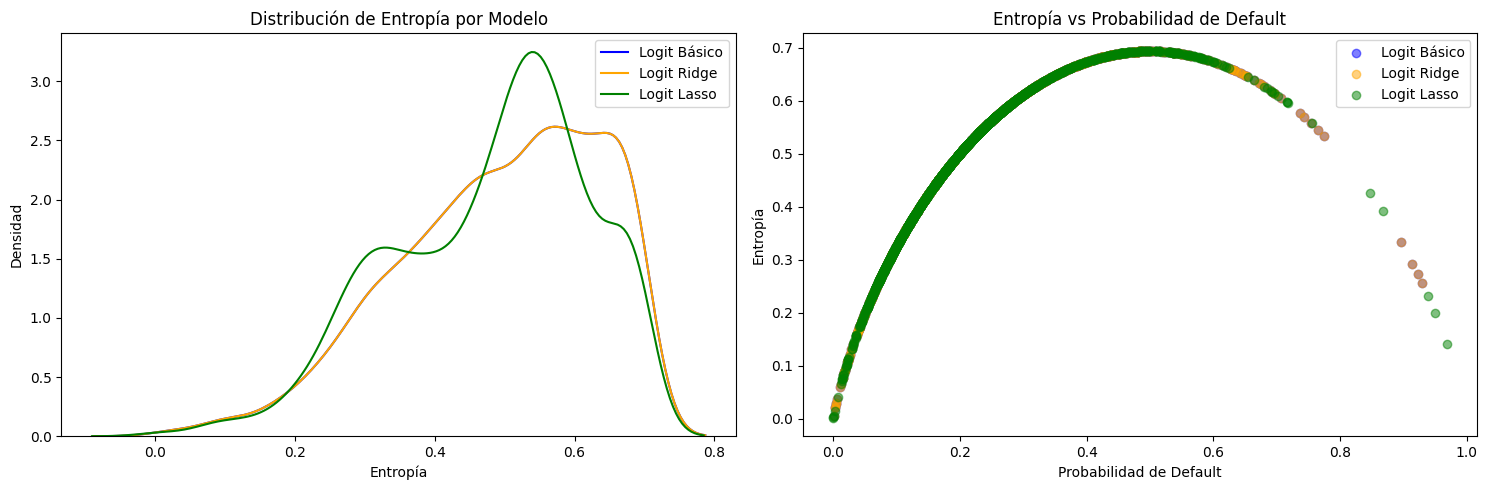


Entropía media por clase real:

Logit Básico:
Clase 0: 0.4768
Clase 1: 0.5550

Logit Ridge:
Clase 0: 0.4768
Clase 1: 0.5550

Logit Lasso:
Clase 0: 0.4631
Clase 1: 0.5424


In [ ]:
# --- Entropia ---

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

def calculate_entropy(probabilities):
    """
    Calcula la entropía de las predicciones.
    probabilities: array de probabilidades de la clase positiva (default)
    """
    # Convertir a probabilidades de ambas clases
    p = np.vstack([1 - probabilities, probabilities]).T
    return entropy(p, axis=1)

def analyze_entropy(y_true, probabilities):
    """
    Analiza y visualiza la entropía de las predicciones de los modelos
    """
    # Calcular entropía para cada modelo
    entropy_dict = {}
    mean_entropy_dict = {}
    for name, probs in probabilities.items():
        entropy_vals = calculate_entropy(probs)
        entropy_dict[name] = entropy_vals
        mean_entropy_dict[name] = np.mean(entropy_vals)
        print(f"\nEntropía media para {name}: {mean_entropy_dict[name]:.4f}")

    # Crear subplot con dos gráficas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 1. Distribución de entropía
    colors = ['blue', 'orange', 'green']
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        sns.kdeplot(data=entropy_vals, label=name, ax=ax1, color=color)
    ax1.set_title('Distribución de Entropía por Modelo')
    ax1.set_xlabel('Entropía')
    ax1.set_ylabel('Densidad')
    ax1.legend()

    # 2. Entropía vs Probabilidad predicha
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        ax2.scatter(probabilities[name], entropy_vals,
                   alpha=0.5, label=name, color=color)
    ax2.set_title('Entropía vs Probabilidad de Default')
    ax2.set_xlabel('Probabilidad de Default')
    ax2.set_ylabel('Entropía')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Análisis adicional: Entropía por clase real
    print("\nEntropía media por clase real:")
    for name, entropy_vals in entropy_dict.items():
        print(f"\n{name}:")
        for clase in [0, 1]:
            mask = y_true == clase
            mean_entropy = np.mean(entropy_vals[mask])
            print(f"Clase {clase}: {mean_entropy:.4f}")

# Ejecutar el análisis
print("=== Análisis de Entropía ===")
analyze_entropy(y_test, probabilities)

### 📊 Interpretación de Gráficas de Entropía en Modelos de Regresión Logística

### 📘 Guía de Lectura e Interpretación

### 1️⃣ Distribución de Entropía por Modelo (Gráfica Izquierda)
* **Eje X (Entropía)**
  - Rango: 0.0 a 0.8
  - Interpretación: 0 indica certeza total, 0.8 indica máxima incertidumbre

* **Eje Y (Densidad)**
  - Representa la frecuencia relativa de cada valor de entropía
  - Picos más altos indican valores más comunes

### 2️⃣ Entropía vs Probabilidad de Default (Gráfica Derecha)
* **Eje X (Probabilidad)**
  - Rango: 0 a 1
  - Representa la probabilidad predicha de default

* **Eje Y (Entropía)**
  - Muestra el nivel de incertidumbre para cada predicción
  - Valores más bajos indican mayor certeza

## 🔍 Análisis de Resultados

### Comportamiento de los Modelos Base
Los modelos Logit Básico y Ridge muestran patrones casi idénticos con entropía media de 0.4944, exhibiendo un pico notable alrededor de 0.6 con una densidad de aproximadamente 2.5. Su distribución sugiere un nivel de incertidumbre consistente en sus predicciones, con una forma de campana ligeramente asimétrica.

### Ventajas del Logit Lasso
El Logit Lasso demuestra un comportamiento distintivo con una entropía media de 0.4806. Su distribución muestra un pico más pronunciado cerca de 0.6 con una densidad que alcanza 3.0, significativamente más alta que los otros modelos. Este pico más agudo indica una mayor concentración de predicciones en un rango específico de incertidumbre.

### Implicaciones para la Toma de Decisiones
La gráfica de Entropía vs Probabilidad muestra una clara forma de U invertida para todos los modelos:
* Entropía máxima (~0.7) en probabilidades cercanas a 0.5
* Entropía mínima (~0.0) en probabilidades cercanas a 0 y 1
* Los tres modelos siguen patrones casi idénticos en esta relación

### Conclusiones sobre Implementación
El Logit Lasso destaca por su distribución más concentrada y pico más alto, sugiriendo una mayor consistencia en sus niveles de incertidumbre. A pesar de las diferencias en la distribución, todos los modelos muestran una relación muy similar entre probabilidad y entropía, como se evidencia en la segunda gráfica.

#### 🎓 Nota Educativa
Estas distribuciones revelan que aunque los modelos tienen entropías medias similares, el Lasso logra una concentración más definida de sus predicciones, lo que podría ser beneficioso para la toma de decisiones consistente en aplicaciones prácticas.

## 🎯 Validación Cruzada en Riesgo Crediticio: Un Enfoque Robusto


La validación cruzada es una técnica estadística que nos permite evaluar la capacidad real de nuestros modelos para predecir nuevos casos. En lugar de confiar en una única división de datos de entrenamiento y prueba, la validación cruzada divide sistemáticamente nuestros datos en múltiples subconjuntos, entrena y evalúa el modelo varias veces, proporcionando una estimación más robusta y confiable de su rendimiento.


## 🔄 Enfoques de Validación Cruzada que Implementaremos

### 1. Validación Cruzada K-Fold 📊
- Divide los datos en K partes iguales
- Entrena el modelo K veces, usando cada parte como conjunto de prueba una vez
- Nos da una visión general de la estabilidad del modelo
- Revela qué tan bien generaliza nuestro modelo a diferentes subconjuntos de datos

### 2. Validación Cruzada Estratificada 📈
- Similar al K-Fold, pero mantiene la proporción de clases en cada división
- Especialmente importante dado nuestro desbalance entre buenos pagadores y defaults
- Proporciona una evaluación más realista del rendimiento en casos de default
- Ayuda a entender mejor cómo maneja el modelo los casos minoritarios pero críticos

## 📊 Curvas de Aprendizaje: La Historia de Cómo Aprende Nuestro Modelo

Las curvas de aprendizaje son como el diario de desarrollo de nuestro modelo, contándonos la historia de cómo mejora (o no) a medida que le proporcionamos más datos. En el contexto de riesgo crediticio, estas curvas son especialmente reveladoras, ya que nos ayudan a entender si nuestro modelo está realmente aprendiendo a identificar patrones de riesgo de manera efectiva.




In [ ]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, learning_curve
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Configuración global del ambiente
# RANDOM_STATE asegura reproducibilidad en los resultados
RANDOM_STATE = 42

# Configuración del estilo de visualización de matplotlib
plt.rcParams.update({
    'figure.autolayout': True,  # Ajuste automático del layout
    'axes.grid': True,          # Mostrar cuadrícula en los gráficos
    'grid.alpha': 0.3           # Transparencia de la cuadrícula
})

def get_cross_validation_results(models, X, y, k=5):
    """
    Realiza validación cruzada K-Fold y Estratificada para múltiples modelos.

    Parámetros:
    -----------
    models : dict
        Diccionario con los modelos a evaluar {nombre_modelo: modelo}
    X : array-like
        Características del dataset
    y : array-like
        Variable objetivo
    k : int, default=5
        Número de folds para la validación cruzada

    Retorna:
    --------
    tuple
        (resultados_kfold, resultados_estratificados)
        Cada elemento contiene los scores de las métricas para cada modelo
    """
    # Definición de métricas de evaluación
    scoring = {
        'accuracy': 'accuracy',                          # Exactitud general
        'precision': make_scorer(precision_score),       # Precisión (verdaderos positivos)
        'recall': make_scorer(recall_score),            # Recall (sensibilidad)
        'f1': make_scorer(f1_score)                     # F1-Score (media armónica)
    }

    # Inicialización de diccionarios para almacenar resultados
    kfold_results = {}
    stratified_results = {}

    # Creación de objetos de validación cruzada
    kfold = KFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)
    stratified = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)

    # Iteración sobre cada modelo para realizar validación cruzada
    for name, model in models.items():
        # Validación K-Fold estándar
        kfold_results[name] = cross_validate(
            model, X, y,
            scoring=scoring,
            cv=kfold,
            return_train_score=True  # También obtener scores de entrenamiento
        )

        # Validación estratificada (mantiene proporción de clases)
        stratified_results[name] = cross_validate(
            model, X, y,
            scoring=scoring,
            cv=stratified,
            return_train_score=True
        )

    return kfold_results, stratified_results

def plot_boxplots_comparison(kfold_results, stratified_results):
    """
    Genera visualización comparativa de boxplots para ambos tipos de validación cruzada.

    Parámetros:
    -----------
    kfold_results : dict
        Resultados de la validación cruzada K-Fold
    stratified_results : dict
        Resultados de la validación cruzada estratificada

    Genera:
    -------
    Figura con 8 subplots (4 métricas x 2 tipos de CV)
    """
    # Definición de métricas a visualizar
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

    # Creación de la figura principal
    fig = plt.figure(figsize=(20, 16))
    plt.subplots_adjust(top=0.9)  # Ajuste para el título principal

    # Generación de subplots para cada métrica y tipo de CV
    for idx, metric in enumerate(metrics):
        # Subplot para K-Fold
        ax1 = plt.subplot(4, 2, 2*idx + 1)
        data_kfold = [kfold_results[model][metric] for model in kfold_results.keys()]
        ax1.boxplot(data_kfold)
        ax1.set_xticklabels(list(kfold_results.keys()), rotation=45)
        ax1.set_title(f'K-Fold CV: {metric.replace("test_", "").capitalize()}')
        ax1.grid(True, alpha=0.3)

        # Subplot para CV Estratificada
        ax2 = plt.subplot(4, 2, 2*idx + 2)
        data_strat = [stratified_results[model][metric] for model in stratified_results.keys()]
        ax2.boxplot(data_strat)
        ax2.set_xticklabels(list(stratified_results.keys()), rotation=45)
        ax2.set_title(f'Stratified CV: {metric.replace("test_", "").capitalize()}')
        ax2.grid(True, alpha=0.3)

    # Ajustes finales de la figura
    plt.suptitle('Comparación de Métodos de Validación Cruzada', y=0.98, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_learning_curves_comparison(models, X, y):
    """
    Genera curvas de aprendizaje comparativas para múltiples modelos.

    Parámetros:
    -----------
    models : dict
        Diccionario con los modelos a evaluar {nombre_modelo: modelo}
    X : array-like
        Características del dataset
    y : array-like
        Variable objetivo

    Genera:
    -------
    Figura con tres subplots, uno para cada modelo
    """
    # Configuración de la validación cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

    # Creación de la figura
    fig = plt.figure(figsize=(20, 6))

    # Generación de curvas de aprendizaje para cada modelo
    for idx, (name, model) in enumerate(models.items(), 1):
        plt.subplot(1, 3, idx)

        # Cálculo de las curvas de aprendizaje
        train_sizes, train_scores, val_scores = learning_curve(
            model, X, y,
            train_sizes=np.linspace(0.1, 1.0, 10),  # 10 puntos entre 10% y 100% del dataset
            cv=cv,
            scoring='f1',    # Usando F1-score como métrica
            n_jobs=-1        # Usar todos los núcleos disponibles
        )

        # Cálculo de estadísticas
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        # Visualización de las curvas
        plt.plot(train_sizes, train_mean, label='Training score', color='blue')
        plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red')

        # Añadir bandas de desviación estándar
        plt.fill_between(train_sizes, train_mean - train_std,
                        train_mean + train_std, alpha=0.1, color='blue')
        plt.fill_between(train_sizes, val_mean - val_std,
                        val_mean + val_std, alpha=0.1, color='red')

        # Configuración del subplot
        plt.title(f'Learning Curves\n{name}')
        plt.xlabel('Training Examples')
        plt.ylabel('F1 Score')
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)

    # Ajustes finales de la figura
    plt.suptitle('Curvas de Aprendizaje por Modelo', y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()



### Boxplot de las técnicas de CV

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

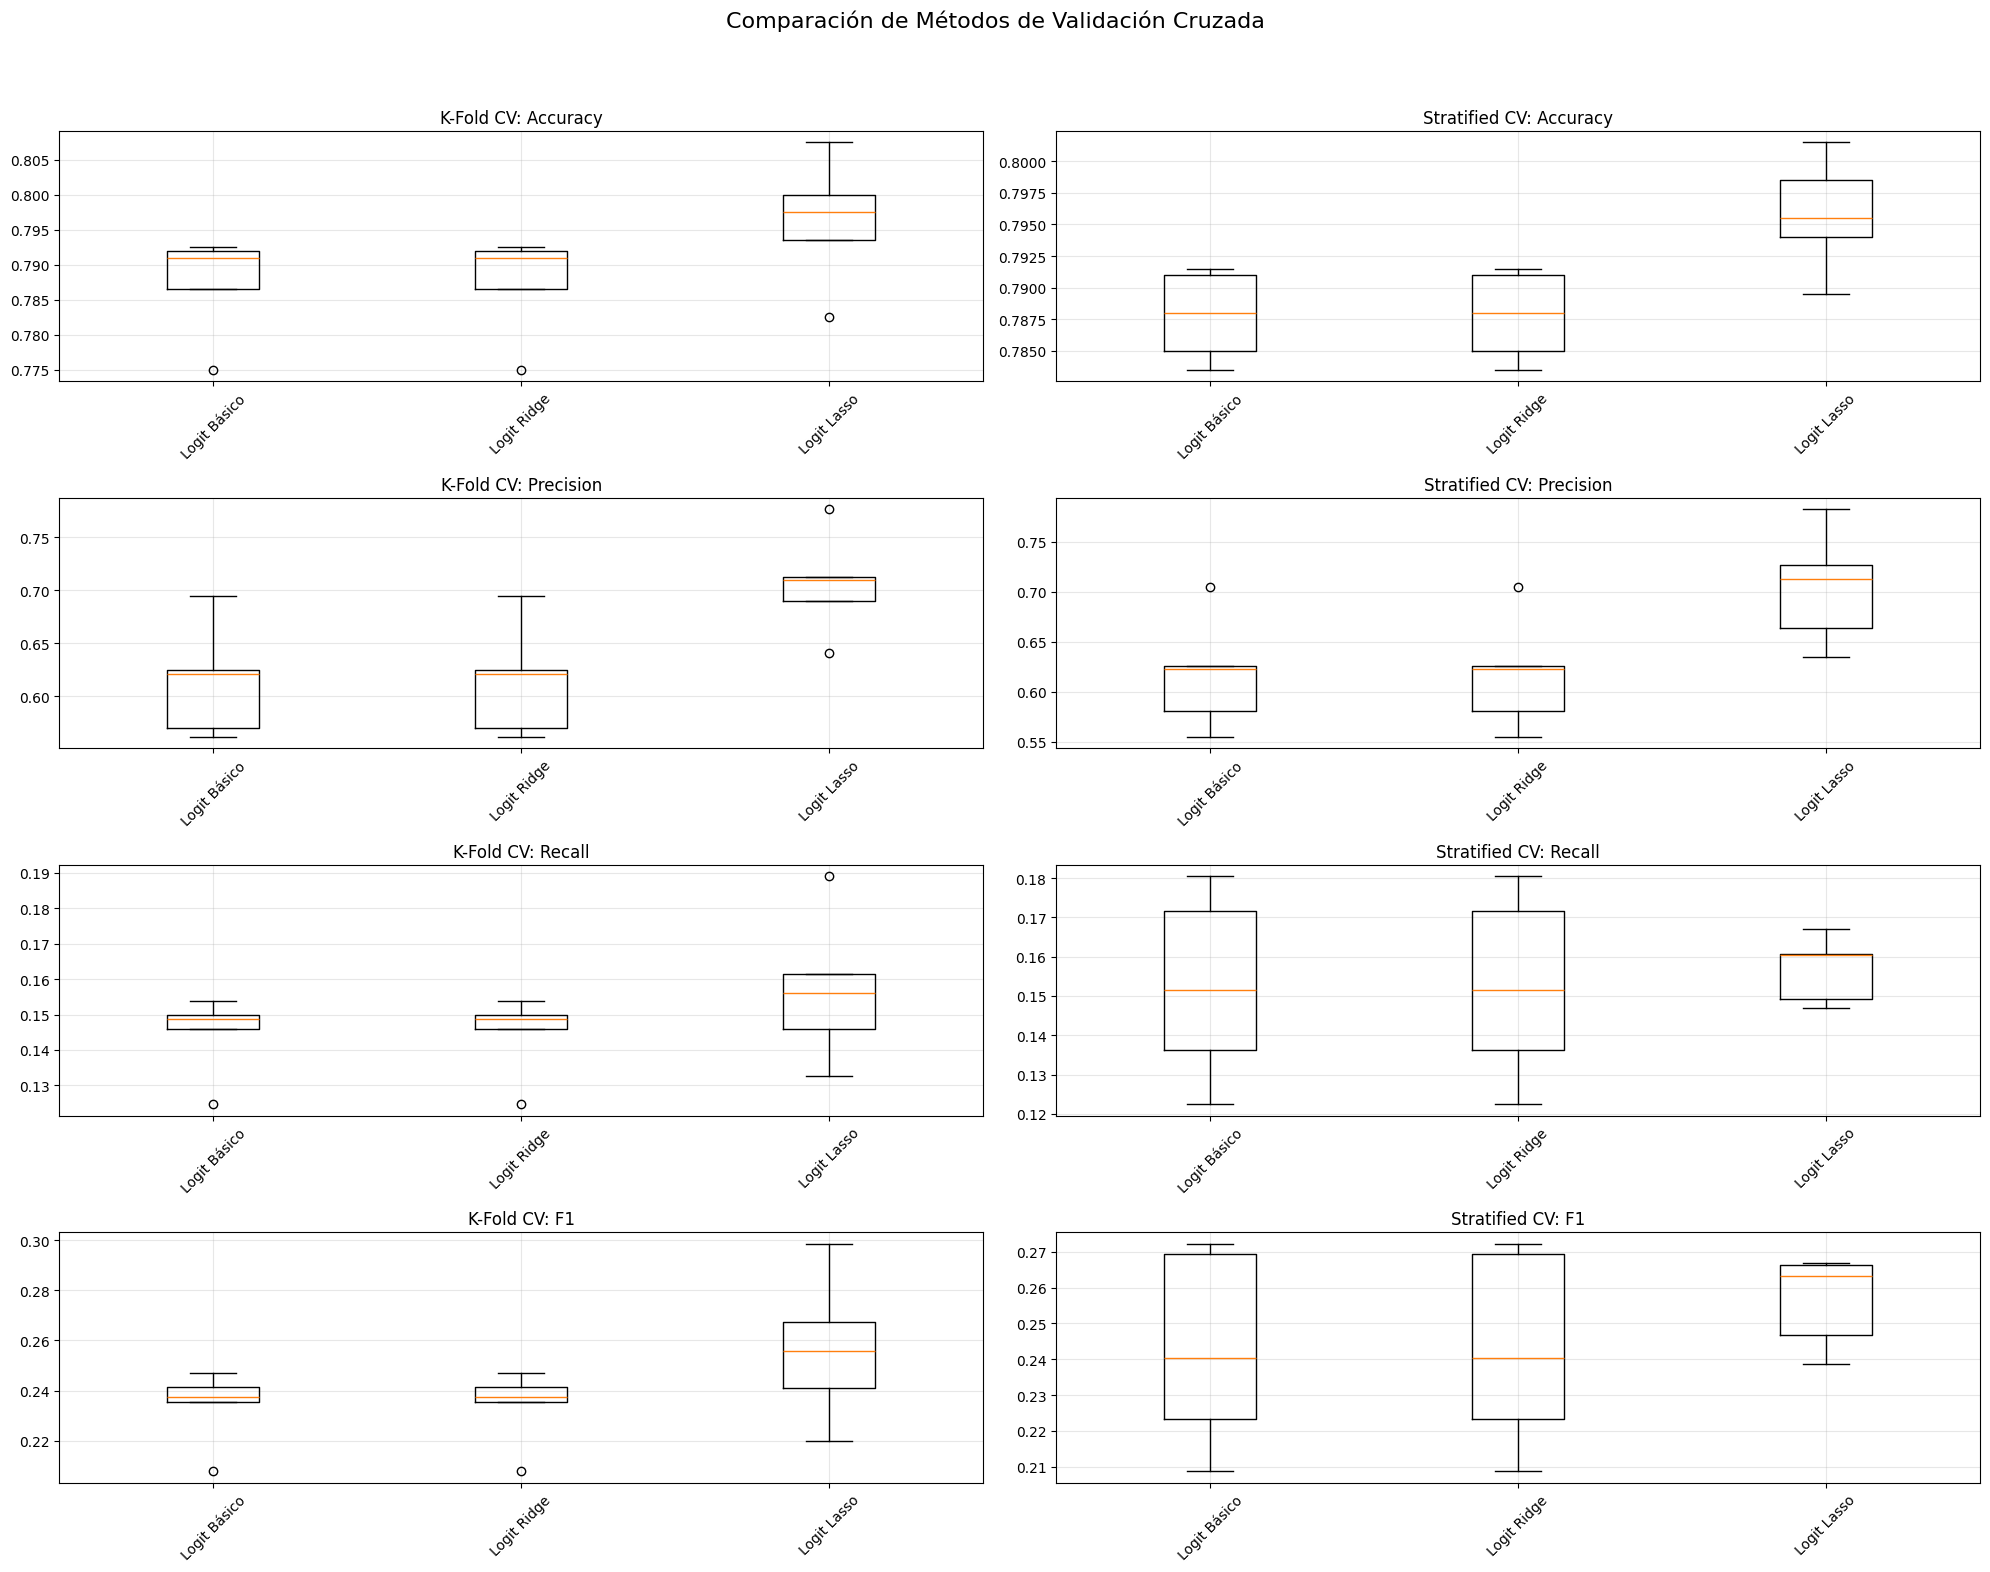

In [ ]:
# Para generar los boxplots:
kfold_results, stratified_results = get_cross_validation_results(models, X, y)
plot_boxplots_comparison(kfold_results, stratified_results)




# 📊 Interpretación de Diagramas de Validación Cruzada

## 📘 Guía de Lectura de Boxplots

### Elementos Fundamentales
* **Línea central (mediana)**: Representa el rendimiento típico de cada modelo logístico
* **Caja**: Contiene el 50% central de los resultados de validación  
* **Bigotes**: Muestran el rango completo de rendimiento, excluyendo outliers
* **Puntos**: Identifican resultados atípicos en las validaciones

### Claves de Interpretación
* **Altura de la Caja**
  - Cajas compactas (como en Logit Lasso) indican predicciones consistentes
  - Cajas más altas (como en modelos básico y Ridge) sugieren mayor variabilidad

* **Posición de la Mediana**
  - Más elevada indica mejor desempeño general
  - Alineación dentro de la caja sugiere distribución balanceada de resultados

## 🔍 Análisis de Resultados

### Accuracy y Estabilidad
El análisis de accuracy revela una clara superioridad del Logit Lasso (~0.80) sobre los modelos básico y Ridge (~0.77-0.78). La caja más compacta del Lasso en la validación estratificada indica mayor estabilidad en sus predicciones, mientras que los otros modelos muestran mayor variabilidad.

### Precision y Recall
En términos de precision, Logit Lasso destaca significativamente con valores entre 0.65-0.70, mientras que los modelos básico y Ridge muestran un rendimiento considerablemente inferior. El recall presenta un patrón similar, con Lasso manteniendo una ventaja consistente (~0.16) sobre los otros modelos (~0.15).

### Comparación entre Validaciones
La validación estratificada produce resultados notablemente más estables que K-Fold, especialmente para el modelo Lasso. Esto se evidencia en cajas más compactas y una menor presencia de valores atípicos, sugiriendo que mantener la proporción de clases es crucial para una evaluación confiable.

### Rendimiento del F1-Score
El F1-Score confirma la superioridad del Lasso, alcanzando valores cercanos a 0.26, mientras que los modelos básico y Ridge se mantienen alrededor de 0.24. La validación estratificada muestra una menor variabilidad en estas métricas, indicando estimaciones más confiables del rendimiento real.

#### 🎓 Nota Educativa
Para problemas de clasificación crediticia con clases desbalanceadas, la validación cruzada estratificada emerge como la técnica más apropiada. La consistencia de sus resultados, particularmente para el modelo Lasso, sugiere que esta metodología proporciona estimaciones más confiables del rendimiento real en producción.

### Curvas de Aprendizaje

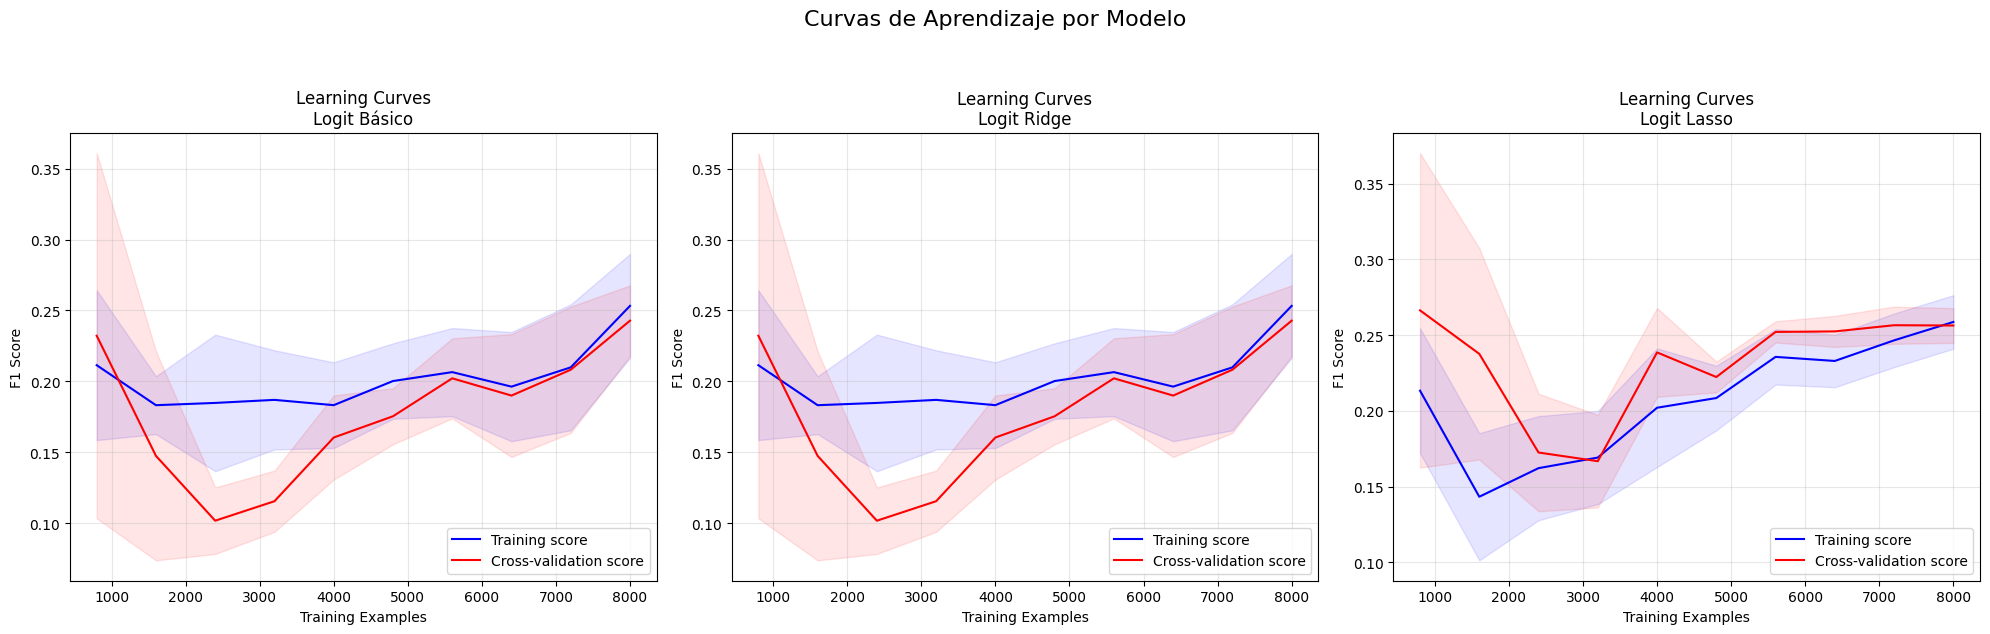

In [ ]:
# Para generar las curvas de aprendizaje:
plot_learning_curves_comparison(models, X, y)

### 📊 Interpretación de Curvas de Aprendizaje

### 📘 Guía de Lectura

### Elementos Fundamentales
* **Línea Azul (Training Score)**: Rendimiento en datos de entrenamiento
* **Línea Roja (Cross-validation Score)**: Rendimiento en datos de validación
* **Área Sombreada**: Representa la variabilidad/incertidumbre del modelo

### Interpretación de Ejes
* **Eje X**: Número de ejemplos de entrenamiento (1000-8000)
* **Eje Y**: F1-Score (métrica de rendimiento combinada)

### 🔍 Análisis de Resultados

### Comportamiento del Logit Básico y Ridge
Los modelos Logit Básico y Ridge muestran patrones similares de aprendizaje subóptimo. Sus curvas de aprendizaje revelan una inestabilidad inicial significativa, con una caída pronunciada en el rendimiento cuando el tamaño de la muestra es pequeño. Ambos modelos luchan por mantener un F1-score consistente, fluctuando entre 0.10 y 0.20, lo que indica dificultades para capturar patrones estables en los datos crediticios.

### Rendimiento Superior del Logit Lasso
El modelo Lasso exhibe un comportamiento notablemente más robusto y prometedor. Su curva de entrenamiento mantiene un F1-score consistentemente más alto, iniciando cerca de 0.26 y estabilizándose alrededor de 0.25. La curva de validación muestra una mayor estabilidad que los otros modelos, sin las caídas dramáticas observadas en los modelos básico y Ridge. La brecha entre entrenamiento y validación es más estrecha, indicando una mejor capacidad de generalización.

### Implicaciones Prácticas
El análisis de las curvas sugiere una clara superioridad del modelo Lasso para este problema de crédito. Su capacidad para mantener un rendimiento estable a través de diferentes tamaños de muestra, junto con una menor variabilidad en las predicciones, lo convierte en la opción más confiable para implementación en producción. Los modelos básico y Ridge, aunque capaces de aprender, muestran una volatilidad que podría ser problemática en aplicaciones del mundo real.

#### 🎓 Nota Educativa
Las curvas de aprendizaje revelan que la regularización L1 del Lasso es crucial para manejar la complejidad inherente de los datos crediticios. Su habilidad para seleccionar características relevantes mientras penaliza la complejidad resulta en un modelo más robusto y generalizable. Este análisis demuestra la importancia de elegir el tipo correcto de regularización en problemas de clasificación crediticia.

# 🔍 Actividad Práctica: Optimización del Modelo de Riesgo Crediticio

Esta actividad tiene como objetivo aplicar los conceptos estudiados para mejorar
el rendimiento del modelo base. Se sugieren las siguientes áreas de experimentación:

1. Regularización
   - Evaluar el impacto del parámetro C en el rendimiento del modelo
   - Valores sugeridos: 0.001, 0.01, 0.1, 1, 10, 100
   
2. Proporción de Conjuntos de Datos
   - Analizar el efecto de diferentes divisiones train/test
   - Proporciones sugeridas: 70/30, 80/20, 90/10

3.  Extensiones Adicionales
   - Evaluar el modelo con otros conjuntos de datos
   - Desarrollar características adicionales
   - Implementar diferentes técnicas de preprocesamiento

